# UNIVARIATE CASE

## A. Generate 20 real number for the variable X from the uniform distribution U [0,1].

In [5]:
import numpy as np
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# uniform distribution of 20 real number
X_train=np.random.uniform(0,1,20)
X_train

array([0.27577485, 0.14042624, 0.86888409, 0.12168556, 0.14263415,
       0.30550616, 0.76732415, 0.5801547 , 0.22726972, 0.8176359 ,
       0.82327234, 0.13895132, 0.77479366, 0.50693513, 0.55371768,
       0.44849906, 0.44421709, 0.40841839, 0.30805702, 0.35594275])

## B. Construct the training set T = { ($x_{1}$, $y_{1}$), ($x_{2}$, $y_{2}$), ... , ($x_{20}$, $y_{20}$)} using the relation :

##$Y_{i}$  = sin(2 π $x_{i}$) + $ε_{i}$ where $ε_{i}$ ~ N(0,0.25)


In [22]:
Y_train =[]

for x_val in X_train:
    Yi = math.sin(2 * math.pi * x_val) + np.random.uniform(0, 0.25) 
    Y_train.append(Yi)

# For better understanding, let's convert X and Y training dataset into a dataframe
df_train = pd.DataFrame(data=(X_train,Y_train),index=['X_train','Y_train'])
df_train = df_train.T
df_train

,X_train,Y_train
0,0.275775,1.102962
1,0.140426,0.988901
2,0.868884,-0.491253
3,0.121686,0.798404
4,0.142634,0.834280
5,0.305506,0.972318
6,0.767324,-0.755766
7,0.580155,-0.251341
8,0.227270,1.010738
9,0.817636,-0.848136


## C. In the similar way construct a testing set of size 50, i.e. Test = { ($x'_{1}$, $y'_{1}$), ($x'_{2}$, $y'_{2}$), ... , ($x'_{50}$, $y'_{50}$)}

In [20]:
X_test = np.random.uniform(0,1,50)
Y_test = []

for i in X_test:
    Yi = math.sin(2 *math.pi*i) + np.random.uniform(0,0.25) 
    Y_test.append(Yi)

# For better understanding, let's convert X and Y testing dataset into a dataframe
df_test = pd.DataFrame(data=(X_test,Y_test),index=['X_test','Y_test'])
df_test = df_test.T
df_test

,X_test,Y_test
0,0.093069,0.672494
1,0.592350,-0.429875
2,0.094118,0.626246
3,0.041885,0.363029
4,0.228975,1.043994
5,0.497071,0.132786
6,0.257512,1.116642
7,0.014501,0.141131
8,0.774871,-0.902163
9,0.938410,-0.163918


## D. Estimate the Regularized Least Squared Polynomial Regression model of order M= 1, 2, 3, 9 using the training set T.


## Example
## 1. For M=1 , we need to estimate F(x) = $β_{1}$x +  $β_{0}$
## 2. For M = 2,  F(x) =  $β_{2}$ $x^{2}$ +  $β_{1}$x +  $β_{0}$

### In the previous assignment, we observed that, as our value of the coefficients increases, this result in the problem  of overfitting. Overfitting occurs when the trained model performs well on the training data and performs poorly on the testing dataset. This can be taken care of by following steps :

### 1. By increasing the training dataset. 
### 2. Regularization methods that will apply a penalizing term (reducing the weights and biases) to overcome overfitting.

### For order m=1

In [100]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_1 = np.flip(np.array(LSPR(df_train['X_train'], df_train['Y_train'], 1)))
LSP_ord_1

array([[-2.67385191,  1.52325434]])

[-2.25377668 -2.45994703 -1.35032045 -2.48849385 -2.45658381 -2.20848832
 -1.50502207 -1.79012875 -2.32766232 -1.42838447 -1.41979875 -2.4621937
 -1.49364411 -1.90166077 -1.83039905 -1.99067378 -1.9971963  -2.05172682
 -2.20460272 -2.13166058]


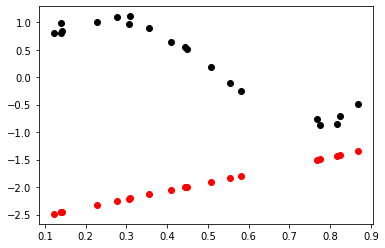

In [147]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_train['X_train'])
y_predicted_m1 = []

for val in X:
  y_val = 0
  for deg in range(1, -1, -1):
    y_val += LSP_ord_1[0][deg] * math.pow(val, deg)
  y_predicted_m1.append(y_val)

# plot to compare trained vs actual values
plt.scatter(X, y_predicted_m1, color='red')
plt.scatter(X, np.array(df_train['Y_train']), color='black')

print(np.array(y_predicted_m1))

In [148]:
y_vs_y_hat_m1 = pd.DataFrame(data=(y_predicted_m1,Y_train),index=['y_predicted_m1','Y_train'])
y_vs_y_hat_m1 = y_vs_y_hat_m1.T
y_vs_y_hat_m1

,y_predicted_m1,Y_train
0,-2.253777,1.102962
1,-2.459947,0.988901
2,-1.350320,-0.491253
3,-2.488494,0.798404
4,-2.456584,0.834280
5,-2.208488,0.972318
6,-1.505022,-0.755766
7,-1.790129,-0.251341
8,-2.327662,1.010738
9,-1.428384,-0.848136


In [149]:
ssr_m1 = []
for itr in range(len(y_vs_y_hat_m1)):
  ssr_i = (y_vs_y_hat_m1['y_predicted_m1'].iloc[itr] - y_vs_y_hat_m1['Y_train'].iloc[itr])**2
  ssr_m1.append(ssr_i)
ssr_m1

[11.26769612386696,
 11.894552214318466,
 0.7379966763821851,
 10.803698465294566,
 10.829783250421515,
 10.117530846695436,
 0.5613844475883881,
 2.3678686275997616,
 11.14491736305904,
 0.33668800216800543,
 0.5181224112189766,
 10.662607094683837,
 0.37855681727174534,
 4.367700078145019,
 2.971206085515547,
 6.2947836672903215,
 6.460486295599981,
 7.22420966123703,
 10.97478042715657,
 9.183926167331354]

In [150]:
regular_m1 =[]
for Lambda in range(1,6):
  result = y_vs_y_hat_m1 + ((Lambda/2) * np.sum(LSP_ord_1**2))
  regular_m1.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}\n: {regular_m1[itr]}\n\n')

RMSE for lambda = 1
:     y_predicted_m1   Y_train
0         2.481117  5.837856
1         2.274947  5.723795
2         3.384573  4.243641
3         2.246400  5.533298
4         2.278310  5.569174
5         2.526406  5.707212
6         3.229872  3.979128
7         2.944765  4.483553
8         2.407232  5.745632
9         3.306509  3.886758
10        3.315095  4.034902
11        2.272700  5.538065
12        3.241250  3.856520
13        2.833233  4.923137
14        2.904495  4.628214
15        2.744220  5.253161
16        2.737698  5.279446
17        2.683167  5.370956
18        2.530291  5.843112
19        2.603233  5.633733


RMSE for lambda = 2
:     y_predicted_m1    Y_train
0         7.216011  10.572750
1         7.009841  10.458689
2         8.119467   8.978535
3         6.981294  10.268192
4         7.013204  10.304068
5         7.261299  10.442106
6         7.964766   8.714022
7         7.679659   9.218447
8         7.142125  10.480526
9         8.041403   8.621652
10        8.049

### For order m=2

In [106]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_2 = np.flip(np.array(LSPR(df_train['X_train'], df_train['Y_train'], 2)))
LSP_ord_2

array([[-2.42725344, -0.29531628,  1.09161131]])

[-2.42567527 -2.44719753 -1.85972666 -2.44702527 -2.44716734 -2.41558991
 -2.01113092 -2.2311686  -2.4379865  -1.93894139 -1.93050975 -2.44721177
 -2.00076266 -2.29643384 -2.25608369 -2.34012336 -2.3430316  -2.36577918
 -2.41463473 -2.39406717]


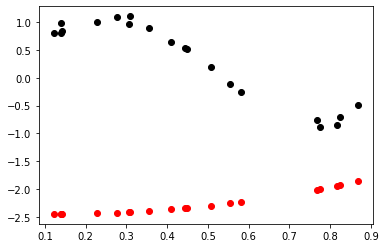

In [142]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_train['X_train'])
y_predicted_m2 = []

for val in X:
  y_val = 0
  for deg in range(2, -1, -1):
    y_val += LSP_ord_2[0][deg] * math.pow(val, deg)
  y_predicted_m2.append(y_val)

# plot to compare trained vs actual values
plt.scatter(X, y_predicted_m2, color='red')
plt.scatter(X, np.array(df_train['Y_train']), color='black')

print(np.array(y_predicted_m2))

In [143]:
y_vs_y_hat_m2 = pd.DataFrame(data=(y_predicted_m2,Y_train),index=['y_predicted_m2','Y_train'])
y_vs_y_hat_m2 = y_vs_y_hat_m2.T
y_vs_y_hat_m2

,y_predicted_m2,Y_train
0,-2.425675,1.102962
1,-2.447198,0.988901
2,-1.859727,-0.491253
3,-2.447025,0.798404
4,-2.447167,0.834280
5,-2.415590,0.972318
6,-2.011131,-0.755766
7,-2.231169,-0.251341
8,-2.437986,1.010738
9,-1.938941,-0.848136


In [144]:
ssr_m2 = []
for itr in range(len(y_vs_y_hat_m2)):
  ssr_i = (y_vs_y_hat_m2['y_predicted_m2'].iloc[itr] - y_vs_y_hat_m2['Y_train'].iloc[itr])**2
  ssr_m2.append(ssr_i)
ssr_m2

[12.451282650792196,
 11.806772634300557,
 1.8727198226881103,
 10.532812102667547,
 10.767895235810403,
 11.477922169250741,
 1.5759407065433033,
 3.9197184940851066,
 11.893701317452178,
 1.1898558603925429,
 1.5141750498272957,
 10.564988641976624,
 1.2597554088774445,
 6.17362173044216,
 4.619934612044602,
 8.170395297760646,
 8.338141200394045,
 9.01105146966599,
 12.41049060447728,
 10.84322940404457]

In [146]:
regular_m2 =[]
for Lambda in range(1,6):
  result = ssr_m2 + ((Lambda/2) * np.sum(LSP_ord_2**2))
  regular_m2.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m2[itr]}\n\n')

RMSE for lambda = 1: [16.03647575 15.39196574  5.45791293 14.11800521 14.35308834 15.06311527
  5.16113381  7.5049116  15.47889442  4.77504896  5.09936815 14.15018175
  4.84494851  9.75881483  8.20512772 11.7555884  11.9233343  12.59624457
 15.99568371 14.42842251]


RMSE for lambda = 2: [19.62166886 18.97715884  9.04310603 17.70319831 17.93828144 18.64830838
  8.74632691 11.0901047  19.06408753  8.36024207  8.68456126 17.73537485
  8.43014162 13.34400794 11.79032082 15.34078151 15.50852741 16.18143768
 19.58087681 18.01361561]


RMSE for lambda = 3: [23.20686196 22.56235195 12.62829914 21.28839142 21.52347455 22.23350148
 12.33152002 14.67529781 22.64928063 11.94543517 12.26975436 21.32056795
 12.01533472 16.92920104 15.37551392 18.92597461 19.09372051 19.76663078
 23.16606992 21.59880872]


RMSE for lambda = 4: [26.79205507 26.14754505 16.21349224 24.87358452 25.10866765 25.81869459
 15.91671312 18.26049091 26.23447373 15.53062828 15.85494747 24.90576106
 15.60052783 20.51439415 18.9

### For order m=3

In [118]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_3 = np.flip(np.array(LSPR(df_train['X_train'], df_train['Y_train'], 3)))
LSP_ord_3

array([[ 26.58829759, -40.35955788,  14.92940119,  -0.50578093]])

[16.58294622 21.21375673  2.45983577 21.89727606 21.13390975 15.63720297
  4.1811551   8.09967754 18.1809813   3.29313737  3.19797649 21.26717561
  4.04492031  9.89933547  8.73203277 11.44451434 11.56155817 12.56056227
 15.55725358 14.09128092]


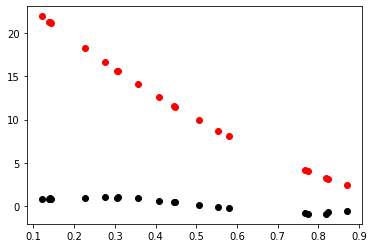

In [119]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_train['X_train'])
y_predicted_m3 = []

for val in X:
  y_val = 0
  for deg in range(3, -1, -1):
    y_val += LSP_ord_3[0][deg] * math.pow(val, deg)
  y_predicted_m3.append(y_val)

# plot to compare trained vs actual values
plt.scatter(X, y_predicted_m3, color='red')
plt.scatter(X, np.array(df_train['Y_train']), color='black')

print(np.array(y_predicted_m3))

In [138]:
y_vs_y_hat_m3 = pd.DataFrame(data=(y_predicted_m3,Y_train),index=['y_predicted_m3','Y_train'])
y_vs_y_hat_m3 = y_vs_y_hat_m3.T
y_vs_y_hat_m3

,y_predicted_m3,Y_train
0,16.582946,1.102962
1,21.213757,0.988901
2,2.459836,-0.491253
3,21.897276,0.798404
4,21.133910,0.834280
5,15.637203,0.972318
6,4.181155,-0.755766
7,8.099678,-0.251341
8,18.180981,1.010738
9,3.293137,-0.848136


In [140]:
ssr_m3 = []
for itr in range(len(y_vs_y_hat_m3)):
  ssr_i = (y_vs_y_hat_m3['y_predicted_m3'].iloc[itr] - y_vs_y_hat_m3['Y_train'].iloc[itr])**2
  ssr_m3.append(ssr_i)
ssr_m3

[239.6299040905943,
 409.04479213292854,
 8.708925640961453,
 445.1623959761673,
 412.07497652101426,
 215.05884188645192,
 24.37319141184618,
 69.73950570736837,
 294.81725154904,
 17.150147152949334,
 15.194154809422237,
 418.7754818778288,
 24.23883077373625,
 94.30530630696003,
 78.12285000638391,
 119.38288166968319,
 121.374416675502,
 142.19370255153098,
 208.7746323796922,
 174.04053035394745]

In [141]:
regular_m3 =[]
for Lambda in range(1,6):
  result = ssr_m3 + ((Lambda/2) * np.sum(LSP_ord_3**2))
  regular_m3.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m3[itr]}\n\n')

RMSE for lambda = 1: [1519.11706181 1688.53194985 1288.19608336 1724.64955369 1691.56213424
 1494.5459996  1303.86034913 1349.22666342 1574.30440926 1296.63730487
 1294.68131253 1698.26263959 1303.72598849 1373.79246402 1357.61000772
 1398.87003939 1400.86157439 1421.68086027 1488.2617901  1453.52768807]


RMSE for lambda = 2: [2798.60421952 2968.01910756 2567.68324107 3004.13671141 2971.04929195
 2774.03315732 2583.34750684 2628.71382114 2853.79156698 2576.12446258
 2574.16847024 2977.74979731 2583.21314621 2653.27962174 2637.09716544
 2678.3571971  2680.34873211 2701.16801798 2767.74894781 2733.01484579]


RMSE for lambda = 3: [4078.09137724 4247.50626528 3847.17039879 4283.62386912 4250.53644967
 4053.52031503 3862.83466456 3908.20097885 4133.2787247  3855.6116203
 3853.65562796 4257.23695503 3862.70030392 3932.76677945 3916.58432315
 3957.84435482 3959.83588982 3980.6551757  4047.23610553 4012.5020035 ]


RMSE for lambda = 4: [5357.57853495 5526.993423   5126.6575565  5563.11102684

### For order m=9

In [127]:
# Least Square Polynomial Regression
def LSPR(x_dataset, y_dataset, degree):
  no_of_rows = len(x_dataset)
  no_of_cols = degree+1

  # finding the X matrix

  # initialize X matrix with 0 initially
  X = np.zeros((no_of_rows, no_of_cols))
  for xi in range (no_of_rows):
    for deg in range (no_of_cols):
      X[xi][deg] += math.pow(x_dataset[xi], deg)
  
  # calculating ((X^T . X)^(−1)) . X^T . Y
  X_Trans_X = np.matrix((np.dot(X.T, X)))
  X_Trans_X_Inv = np.matrix((np.dot(X.T, X))).I
  temp = np.matrix(np.dot(X_Trans_X_Inv, X.T))
  return np.dot(temp, y_dataset.values)

LSP_ord_9 = np.flip(np.array(LSPR(df_train['X_train'], df_train['Y_train'], 9)))
LSP_ord_9

array([[ 4.39813798e+04, -1.90407671e+05,  3.52466121e+05,
        -3.64561889e+05,  2.31020376e+05, -9.24458255e+04,
         2.32025986e+04, -3.51332770e+03,  2.93540570e+02,
        -9.54230690e+00]])

[11829.91457942 23269.05001548   148.60208054 25421.99080048
 23025.94970302 10097.0392238    415.29848291  1867.16459291
 15196.73692618   255.90054438   241.70218866 23432.65916907
   387.53152187  3068.61592991  2244.66891811  4439.76921834
  4557.71952189  5651.03236911  9958.94897223  7647.35170206]


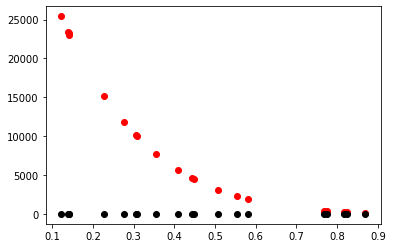

In [128]:
# Get the 'x' test data as an array to pass on to polynomial function
X = np.array(df_train['X_train'])
y_predicted_m9 = []

for val in X:
  y_val = 0
  for deg in range(9, -1, -1):
    y_val += LSP_ord_9[0][deg] * math.pow(val, deg)
  y_predicted_m9.append(y_val)

# plot to compare trained vs actual values
plt.scatter(X, y_predicted_m9, color='red')
plt.scatter(X, np.array(df_train['Y_train']), color='black')

print(np.array(y_predicted_m9))

In [137]:
y_vs_y_hat_m9 = pd.DataFrame(data=(y_predicted_m9,Y_train),index=['y_predicted_m9','Y_train'])
y_vs_y_hat_m9 = y_vs_y_hat_m9.T
y_vs_y_hat_m9

,y_predicted_m9,Y_train
0,11829.914579,1.102962
1,23269.050015,0.988901
2,148.602081,-0.491253
3,25421.990800,0.798404
4,23025.949703,0.834280
5,10097.039224,0.972318
6,415.298483,-0.755766
7,1867.164593,-0.251341
8,15196.736926,1.010738
9,255.900544,-0.848136


In [136]:
ssr_m9 = []
for itr in range(len(y_vs_y_hat_m9)):
  ssr_i = (y_vs_y_hat_m9['y_predicted_m9'].iloc[itr] - y_vs_y_hat_m9['Y_train'].iloc[itr])**2
  ssr_m9.append(ssr_i)
ssr_m9

[139920784.27475277,
 541402668.0304497,
 22228.82214186255,
 646237022.8510971,
 530155940.25301456,
 101930566.9599316,
 173101.13815832624,
 3487242.2691515633,
 230910094.38326323,
 65919.88500310319,
 58758.81696639201,
 549051875.5111326,
 150862.24751420808,
 9415248.46641902,
 5039017.487522355,
 19706949.009242494,
 20767843.702778086,
 31926978.42549603,
 99158592.48873581,
 58468241.39082999]

In [135]:
regular_m9 =[]
for Lambda in range(1,6):
  result = ssr_m9 + ((Lambda/2) * np.sum(LSP_ord_9**2))
  regular_m9.append(result)

for itr in range(5):
    print(f'RMSE for lambda = {itr+1}: {regular_m9[itr]}\n\n')

RMSE for lambda = 1: [1.79037229e+11 1.79438711e+11 1.78897330e+11 1.79543545e+11
 1.79427464e+11 1.78999239e+11 1.78897481e+11 1.78900795e+11
 1.79128218e+11 1.78897374e+11 1.78897367e+11 1.79446360e+11
 1.78897459e+11 1.78906723e+11 1.78902347e+11 1.78917015e+11
 1.78918076e+11 1.78929235e+11 1.78996467e+11 1.78955776e+11]


RMSE for lambda = 2: [3.57934537e+11 3.58336019e+11 3.57794638e+11 3.58440853e+11
 3.58324772e+11 3.57896547e+11 3.57794789e+11 3.57798103e+11
 3.58025526e+11 3.57794682e+11 3.57794675e+11 3.58343668e+11
 3.57794767e+11 3.57804031e+11 3.57799655e+11 3.57814323e+11
 3.57815384e+11 3.57826543e+11 3.57893775e+11 3.57853084e+11]


RMSE for lambda = 3: [5.36831845e+11 5.37233327e+11 5.36691946e+11 5.37338161e+11
 5.37222080e+11 5.36793855e+11 5.36692097e+11 5.36695411e+11
 5.36922834e+11 5.36691990e+11 5.36691983e+11 5.37240976e+11
 5.36692075e+11 5.36701339e+11 5.36696963e+11 5.36711631e+11
 5.36712692e+11 5.36723851e+11 5.36791083e+11 5.36750392e+11]


RMSE for lamb